In [1]:
# March 2022

# for communication

# twitter https://twitter.com/runaz_there

# Логистическая регрессия

In [2]:
# ! pip install category_encoders

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import os
from category_encoders import TargetEncoder

from scipy.stats import norm
from scipy import stats 

from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

# Введение

Логистическая регрессия применяется, если зависимая переменная является бинарной, а независимые переменные - непрерывными и(или) категориальными. 

Условия применения модели:

1) категориальные переменные должны быть закодированы;
2) непрерывные переменные должны быть масштабированы и приведены к нормальному распределению. В некоторых учебниках указывают, что приведение к нормальному распределению не является обязательным;
3) независимость переменных;
4) наличие линейной зависимости между хотя бы одной перменной и логитом зависимой переменной;
5) отсутствие мультиколлинеарности между переменными;
6) отсутствие дисбаланса классов.

Ниже я приведу описание логистической регрессии на основании учебника Applied Logistic Regression. После этого я постараюсь дать более интуитивное представление о логистической регрессии.

Логистическая регрессия весьма близка к линейной регрессии. Однако, если в линейной регрессии зависимая переменная является непрерывной, то логистическая регрессия применяется, как правило, для дихотоматических переменных. Мотивировка использования именно логистической регрессии, а не линейной, следующая.  В задаче классификации надо предсказать вероятность, которая не может быть отрицательной и не может быть больше 1. Но если формально применить линейную регрессию здесь, то можно вполне получит как отрицательные значения, так и значения больше 1. Поэтому нужен другой подход.

Любая задача регрессии пытается отыскать среднее значение (вероятность) зависимой переменной при заданных независимых перменных. Это выражается как “E(Y|x), где Y - это целевой признак, а x - признак. В линейной регрессии исходят из того, что найти среднее значение можно по формуле 1:

![Логистическая регрессия](./images/logreg3.png 'Логистическая регрессия')

В этом выражении x может принимать любое значение от минус бесконечности до плюс бесконечности, что соответствующим образом отражается в Y. Однако в логистической регрессии Y может быть только дихотомическим, то есть 0 ≤ E(Y|x) ≤ 1. Это является мотивировкой для использования именно логистической регрессии.

В рамках логистической регрессии изменяются обозначения. Теперь вместо E(Y|x) используется обозначение π(x). Далее, вместо формулы 1 используется следующая формула 2:

![Логистическая регрессия](./images/logreg1.png 'Логистическая регрессия')

Эта запись может быть трансформирована к простой линейной модели с помощью следующей формулы:

![Логистическая регрессия](./images/logreg2.png 'Логистическая регрессия')

Это называется логит-трансформацией. Логит позволяет сохранить важные свойства линейной регрессии: является линейным по параметрам, может принимать значения x от минус до плюс бесконечности. 

В логистической регрессии конкретное значение **y** получается как y = π(x) + ε, где ε - это ошибка. Из этой формулы видно, что ошибка равна: ε = y - π(x). Так как y может принимать только два значения - 0 и 1 - последняя формула может быть переписана. Если y = 1, то ошибка равна ε = 1 - π(x) с вероятностью π(x), а если y = 0, то ошибка равна ε = −π(x) с вероятностью 1 - π(x). Тогда ε распределено со средним равным 0 и дисперсией, которая равна π(x)[1 − π(x)]. Это показывает, что ошибка в логистической регрессии распределена по биномиальному закону.

Итак, необходимо найти коэффициенты в формуле 2. Это делается с помощью метода максимального правдоподобия. Формула 2 показывает условную вероятность получить значение 1 при произвольном наборе параметров β = (β0, β1). Это и обозначается как π(x). Но тогда, запись 1 - π(x) дает условную вероятность получения значения 0. В таком случае, если взять указанную формулу для единичной строки набора данных, то получим запись:

![Логистическая регрессия](./images/logreg4.png 'Логистическая регрессия')

Если же взять для всех строк набора данных, то получится формула:

![Логистическая регрессия](./images/logreg5.png 'Логистическая регрессия')

Почему здесь используется умножение? Потому что строки набора данных объединены операцией И, а не ИЛИ. 

Теперь надо подобрать коэффициенты так, чтобы указанное выражение максимизировалось. Это проще сделать, если сначала привести формулу к логарифмическому виду:

![Логистическая регрессия](./images/logreg6.png 'Логистическая регрессия')

Чтобы найти значения β, которые максимизируют приведенное уравнение, проводим дифференцирование. 

Теперь я постараюсь дать более интуитивное описание.

Общий смысл логистической регрессии следующий:

1) у меня есть независимые переменные и зависимая переменная. При этом зависимая переменная может быть представлен либо непрерывной величиной, либо категориями. В случае с категориями это могут быть и 0, 1, 2 и другие числа, но они в любом случае отражают категорию. Далее предполагаем, что зависимая переменная - категориальная, причем у нее только две категории: 1 (которая представляет редкую категорию) и 0 (который представляет частую категорию);
2) можно предсказать вероятность события: **y** = 1, то есть вероятность появления редкого события. Другими словами, вероятность того, что зависимая переменная принимает значение 1. Здесь надо помнить, что вероятность во всех случаях не может превышать значение 1. Поэтому вероятность противоположного события, 0 или частая категория, может быть получена как 1 минус вероятность редкого события;
3) в логистической регрессии вместо непосредственного предсказания вероятности предсказывают отношение шансов, выраженное логистической функцией. Данная функция в знаменателе содержит параметр, который представляет из себя линейную функцию. Другими словами, пусть дана таблица. В этой таблице есть строка, которая отражает одно наблюдение, пускай это будет категория 1, содержащее несколько признаков (столбцов). Возьму каждое из таких значений и умножу каждое на коэффициент (иначе говорят: произведу взвешивание признаков), составлю из совокупности таких взвешенных значений сумму. Так получилась вероятность появления категорий 1 в таблице. Но в таблице есть не только категория 1, есть также и категория 0. Проделаю с категорией 0 ту же операцию, а затем умножу вероятность для категории 1 на вероятность для категории 0. В формулах, которые на этом месте приводятся в учебниках, разница между вероятностями для категорий показана за счет возведения в степень. Если y = 1, то вероятность в степени 1 дает вероятность только для категории 1, а если степень **y** - 1, то получается вероятность для категории 0;
4) таким образом получается функция распределения. Переведу эту функцию в логарифмическую формулу;
5) итак, получилось полное описание зависимой переменной с вероятностной точки зрения. Теперь необходимо найти коэффициенты в линейной функции. Очевидно, что ничто не мешает подставить любые значения коэффициентов. Однако надо помнить, что функция распределения - это вероятность появления такой таблицы, в которой у зависимой переменной есть определенное количество категорий 1 и категорий 0. Такая вероятность должна быть максимальной. Следовательно, надо найти такие коэффициенты (так взвесить все значения всех переменных для каждой строки-наблюдения в таблице), чтобы вероятность была максимальной;
5) для этого надо составить функцию распределения. Смысл ее можно понять так: в этой функции есть степени - это **y**. Так как **y** может принимать значение либо 1, либо 0, то степень здесь фактически является показателем того значения, для которого степень указана. В степень возвоздится выражение, которое показывает вероятность наступления события (либо события 1, либо события 0, что показано степенью). Так как в одной ячейке может быть либо 1, либо 0, то функция составлена таким образом, что если y принимает значение 1, то применяется первая часть функции, а если принимает значение 0, то применяется вторая часть функции;
7) для решения задачи максимизации функции правдоподобия могут быть использованы разные методы, в том числе градиентный спуск.

Как и в случае с линейной регрессией, я буду использовать три подхода: 

1) визуальный; 
2) статистический;
3) машинное обучение. 

Визуализировать данные необходимо, так как именно визуально человеку легче схватить какие-то значимые характеристики распределения данных (если, конечно, данные это позволяют). Статистический подход необходим, чтобы понимать, как работает логистическая регрессия "под капотом". Машинное обучение позволяет проводить множество различных манипуляций с данными для улучшения модели предсказания.

Дополнительные ссылки:

1. Дополнительно по методу правдоподобия см. гл. 4.4 учебника Основы обучения. 

2. Об оценке D, используемой в логистической регрессии, см. стр. 26 Applied Logistic Regression. Статистика D играет такую же роль в логистической регрессии, что и сумма квадратов остатков в линейной регрессии.

На основе статистики D считается статистика G, которая показывает насколько значимой является независимая переменная. Роль статистики G аналогична роли статистики F-теста в линейной регрессии. Формула на ст. 27 того же учебника.

Также для оценки модели можно использовать the Wald test или the Score test. Подробнее на стр 28 того же учебника. 


# Загрузка и описание данных

In [4]:
data = pd.read_csv(os.getcwd() + '\\gd_augmentation.csv', 
    dtype = {'decade':'object','quarter':'object', 'tra_co':'object', 'multivolume':'object'}) 

In [5]:
db = data.copy()
db = db.drop(['title', 'language_code'], axis=1)

In [6]:
db.head(3)

,average_rating,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
0,4.57,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667
1,4.49,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000
2,4.42,352,6333,244,2000,4,0,1,40,0.000000,0.000000


In [7]:
db.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,len_title,polarity,subjectivity
count,10838.000000,10838.000000,1.083800e+04,10838.000000,10838.000000,10838.000000,10838.000000
mean,3.942158,344.175217,1.834788e+04,553.074737,30.258719,0.031306,0.149035
std,0.295387,238.556381,1.138660e+05,2599.330244,22.938807,0.193648,0.270061
min,1.000000,11.000000,0.000000e+00,0.000000,2.000000,-1.000000,0.000000
25%,3.770000,203.000000,1.170000e+02,10.000000,15.000000,0.000000,0.000000
50%,3.960000,304.000000,8.035000e+02,49.000000,22.000000,0.000000,0.000000
75%,4.130000,417.000000,5.226750e+03,248.000000,39.000000,0.000000,0.250000
max,5.000000,6576.000000,4.597666e+06,94265.000000,254.000000,1.000000,1.000000


Для логистической регрессии нужен дихотамический признак. Надо превратить **average_rating** в такой признак. Однако здесь есть одна сложность, которая видна из описания данных. Половина средних оценок выше  3.96 и ниже 3.96. Только 25% оценок больше 4.13. Таким образом, если признать хорошими оценками только 4 и 5, то могут возникнуть сложности. Поэтому здесь можно снизить планку для оценки хорошо.

Итак, оценка хорошо - это будет оценка от 3.96. Плохая оценка будет ниже 3.96.

In [8]:
# группы, на которые разбиваю среднюю оценку
bins = [0, 3.96, 5] 

# название этих групп
groups_names = ['0', '1'] 

# провожу разбиение на группы
db['rating_groups'] = pd.cut(db['average_rating'], bins, labels=groups_names, right=True).astype('int64') 

# удаляю количественный признак, на основании которого построил бинарный
db = db.drop('average_rating', axis=1) 

In [9]:
db.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10838 entries, 0 to 10837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_pages           10838 non-null  int64  
 1   ratings_count       10838 non-null  int64  
 2   text_reviews_count  10838 non-null  int64  
 3   decade              10838 non-null  object 
 4   quarter             10838 non-null  object 
 5   tra_co              10838 non-null  object 
 6   multivolume         10838 non-null  object 
 7   len_title           10838 non-null  int64  
 8   polarity            10838 non-null  float64
 9   subjectivity        10838 non-null  float64
 10  rating_groups       10838 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 931.5+ KB


Проверю, сколько наблюдений содержит каждый класс.

In [10]:
db['rating_groups'].value_counts(normalize=True)

0    0.510611
1    0.489389
Name: rating_groups, dtype: float64

# Поиск простого решения

Всегда нужно искать простое решение. Поэтому сразу проведу проверку данных как они есть.

In [11]:
# вызываю и обучаю модель
model0 = smf.logit('rating_groups ~ num_pages + ratings_count + text_reviews_count +  len_title + polarity + subjectivity + C(multivolume) + C(decade) + C(quarter) + C(tra_co)', 
                    data=db).fit() 

Optimization terminated successfully.
         Current function value: 0.665100
         Iterations 5


In [12]:
# вызов результата модели
print(model0.summary()) 

                           Logit Regression Results                           
Dep. Variable:          rating_groups   No. Observations:                10838
Model:                          Logit   Df Residuals:                    10819
Method:                           MLE   Df Model:                           18
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                 0.04015
Time:                        11:00:13   Log-Likelihood:                -7208.4
converged:                       True   LL-Null:                       -7509.9
Covariance Type:            nonrobust   LLR p-value:                1.933e-116
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.1735      0.447     -2.623      0.009      -2.050      -0.297
C(multivolume)[T.1]     0.4866      0.047     10.339      0.000       0.394       0.579
C(decade)[T.1950

Ниже интерпретация вывода. 

**coef** - это коэффициенты при независимых переменных в формуле регрессии, где зависимой переменной выступает логит. 

**P>|z|** - это p-value. Нулевая гипотеза состоит в том, что коэффициент равен нулю.  

**Log-Likelihood** - это натуральный логарифм функции оценки максимального правдоподобия

**LL-Null** - это значение логарифмической вероятности модели, когда независимая переменная не включена (включен только перехват). 

**LLR p-value** - это проверка на принятие нулевой гипотезы: модель, в которой все коэффициенты равны 0, и которая определяется только точкой пересечения с осью **y**, лучше, чем модель, в которой есть коэффициенты. Здесь можно отклонить нулевую гипотезу.

**Pseudo R-squ** - это отношение логарифмической вероятности нулевой модели к полной модели. То же, что коэффициент детерминации в линейной регрессии. Показывает уровень объясненной дисперсии. Чем ближе к 1, тем лучше. Здесь всего 0.024, то есть модель может объяснить только 2,4% дисперсии.

**Z-оценка** - это коэффициент, деленный на стандартную ошибку. Чем ниже, тем лучше.

Коэффициент для **num_pages** составляет 0.0014. Это значит, что для каждого увеличения количества страниц увеличиваются логарифмические шансы (не вероятность, а именно логарифм шанса), что книга имеет положительную оценку.

# Визуальный подход

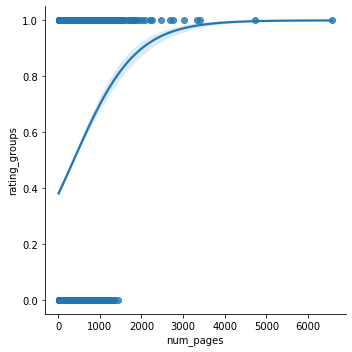

In [13]:
sns.lmplot(x='num_pages', y='rating_groups', data=db, logistic=True)

Интерпретация графика следующая. По оси **x** - количество страниц, по оси **y** - оценка книги. Линия регрессии показывает вероятность получить оценку 1 или 0. Например, при количестве страниц в 1000, вероятность получить оценку 1 близка к 0,6.

# Статистический подход

В рамках статистического подхода я буду работать отдельной копией данных. Машинное обучение надо проводить на другой копии.

Вот что я сделаю:

1) укрупню категории. Если категорий в переменной слишком много и они содержат мало наблюдений, то такие категории плохо будут разделять целевой признак на 0 и 1;

2) создам новые переменные;

3) масштабирую данные.

Здесь я не буду удалять выбросы.

In [14]:
db_stat = db.copy()

# Укрупнение категорий

In [15]:
# количество по категориям в процентном измерении
db_stat['decade'].value_counts(normalize=True) 

2000    0.676509
1990    0.224765
1980    0.056283
1970    0.018454
2010    0.012641
1960    0.006643
1950    0.002676
1940    0.002030
Name: decade, dtype: float64

In [16]:
# количество по категориям в абсолютном измерении
db_stat['decade'].value_counts() 

2000    7332
1990    2436
1980     610
1970     200
2010     137
1960      72
1950      29
1940      22
Name: decade, dtype: int64

Укрупню категории через объединение 1940 и 1950 с 1960.

In [17]:
db_stat['decade'] = db_stat['decade'].replace(['1950', '1940'], '1960')
db_stat['decade'].value_counts() 

2000    7332
1990    2436
1980     610
1970     200
2010     137
1960     123
Name: decade, dtype: int64

In [18]:
db_stat['quarter'].value_counts(normalize=True)

3    0.263056
4    0.250415
2    0.249769
1    0.236760
Name: quarter, dtype: float64

Распределение по кварталам примерно одинаковое. Поэтому не буду изменять этот признак. Про признаки **tra_co** и **multivolume** стоит отметить, что они разделены всего на две категории.

# Создание новых признаков

In [19]:
db_stat['rating_reviews'] = db_stat['ratings_count'] / db_stat['text_reviews_count']

# в результате деления у нас может возникнуть NaN, заменю его на 1
db_stat['rating_reviews'].replace(np.nan, 1, inplace=True) 

# избавлюсь от бесконечности
db_stat['rating_reviews'].replace([np.inf, -np.inf], 1, inplace=True) 

Дополнительно создам такую переменную: среднее значение количества страниц, если у книги есть соавтор/переводчик. Для этого буду использовать функцию.

На вход функция принимает: 

**data** - наши данные;

**cat_feat** - категориальная переменная;

**real_feat** - количественная переменная.

Функция возвращает новый столбец данных, в котором для каждой группы в категориальных данных определяется среднее количественной переменной.

In [20]:
"""
Function to create a new feature
"""
def code_mean(data, cat_feat, real_feat):
    return (data[cat_feat].map(data.groupby(cat_feat)[real_feat].mean()))

db_stat['pages_decade'] = code_mean(db_stat, 'decade', 'num_pages')

*Заметка к коду*

Как читать код data[cat_feat].map(data.groupby(cat_feat)[real_feat].mean())?

Здесь я беру столбец cat_feat. Далее применяю метод map, который использует группировку по cat_feat, но берет значения по этим группам из столбца real_feat, для которых находит среднее.

In [21]:
db_stat.head(3)

,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity,rating_groups,rating_reviews,pages_decade
0,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667,1,75.955565,341.866067
1,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000,1,73.685603,341.866067
2,352,6333,244,2000,4,0,1,40,0.000000,0.000000,1,25.954918,341.866067


Теперь надо масштабировать количественные переменные. Для этого можно использовать робастный шкалировщик, так как в данных есть выбросы.

Поступлю следующим образом: определю признаки, которые буду шкалировать, передам их шкалировщику, заменю исходный признак на масштабированный.

Если набор данных маленький и есть много выбросов, то рекомендуется использовать RobustScaler.

In [22]:
# список количественных переменных
col_names = ['num_pages', 'ratings_count', 'text_reviews_count', 'pages_decade', 'len_title', 'polarity', 'subjectivity'] 

# создаю датафрейм с количественными переменными
features = db_stat[col_names] 

# вызываею и обучаю шкалировщик
scaler = QuantileTransformer(n_quantiles=10, random_state=0).fit(features.values) 

# преобразую данные
features = scaler.transform(features.values) 

# применяю результаты
db_stat[col_names] = features 

# Обучение

In [23]:
# вызываю и обучаю модель

model = smf.logit('rating_groups ~ num_pages + ratings_count + text_reviews_count +  len_title + polarity + subjectivity + C(multivolume) + C(decade) + C(quarter) + C(tra_co) +  pages_decade', 
                data=db_stat).fit() 

Optimization terminated successfully.
         Current function value: 0.657963
         Iterations 5


In [24]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:          rating_groups   No. Observations:                10838
Model:                          Logit   Df Residuals:                    10820
Method:                           MLE   Df Model:                           17
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                 0.05045
Time:                        11:00:33   Log-Likelihood:                -7131.0
converged:                       True   LL-Null:                       -7509.9
Covariance Type:            nonrobust   LLR p-value:                4.508e-150
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.2198   2.62e+04  -4.66e-05      1.000   -5.14e+04    5.14e+04
C(multivolume)[T.1]     0.2847      0.049      5.772      0.000       0.188       0.381
C(decade)[T.1970

Увеличилась объясненная дисперсия (0.050) и Log-Likelihood (7127), а также коэффициент при **num_pages** стал 0.6445. 

<AxesSubplot:>

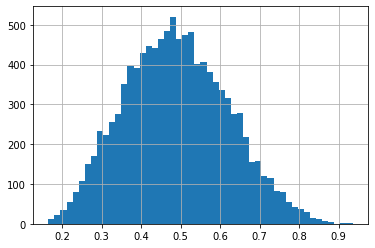

In [25]:
# получаю значения вероятности
proba = 1 / (1 + np.exp( - model.fittedvalues)) 
proba.hist(bins=50)

Эффективная модель делила бы вероятности на два класса, ближе к 0 и к 1. Неэффективная сосредотачивает вероятности возле 0,5.

In [26]:
# оставлю только один признак
model1 = smf.logit('rating_groups ~ num_pages', data=db_stat).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.689361
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          rating_groups   No. Observations:                10838
Model:                          Logit   Df Residuals:                    10836
Method:                           MLE   Df Model:                            1
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                0.005140
Time:                        11:00:33   Log-Likelihood:                -7471.3
converged:                       True   LL-Null:                       -7509.9
Covariance Type:            nonrobust   LLR p-value:                 1.548e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3456      0.040     -8.715      0.000      -0.423      -0.268
num_pages      0.6123      0.070      8.759      0.000       0.475       0.749
==============================================================================
"""

In [27]:
model1.params

Intercept   -0.345613
num_pages    0.612274
dtype: float64

Для интерпретации логистической регрессии важно учитывать следующее. Регрессионный коэффициент дан в форме натурального логарифма. Поэтому увеличение или уменьшение такого коэффициента - это увеличение или уменьшение логарифма шанса. Поэтому надо перевести его в запись через экспоненту, чтобы получить значение просто шанса. Кроме того, можно также получить значение вероятности.

In [28]:
# логарифм шанса - в шанс
model_odds = pd.DataFrame(np.exp(model1.params), columns=['OR'])
model_odds['z-value'] = model1.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model1.conf_int())
model_odds

,OR,z-value,2.5%,97.5%
Intercept,0.707786,2.908202e-18,0.654856,0.764995
num_pages,1.844622,1.971592e-18,1.608443,2.115480


# Машинное обучение

Как и в случае с линейной регрессией, применение машинного обучения предполагает ответы на следующие вопросы:

1) Какую модель выбрать? Логистическая регрессия.

2) Как подготовить данные? Надо получить такие переменные, которые будут хорошо разделять зависимую переменную на 1 и 0. Для этого надо преобразовать имеющиеся переменные и получить новые. В рамках этого я постараюсь привести количественные переменные к нормальному распределению и масштабирую данные. Категориальные данные закодирую. Как количественные, так и категориальные данные разобъю по группам.

3) Какие параметры модели настраивать и как? Буду использовать решетчатый поиск с кросс-валидацией.

4) Что будет оценкой качества модели? Точность, а также матрица ошибок.

5) Как можно получить предсказания по новым данным?

Порядок действий такой:

1) разделяю данные на тренировочный и тестовый наборы;

2) обработаю переменные;

3) задам модель логистической регрессии;

4) обучу модель с настройкой параметров и оценкой;

5) выберу лучшую модель;

6) применю для новых данных.

In [29]:
# создаю копию наших данных
db_ml = db.copy() 

# независимые переменные
X = db_ml.drop(['rating_groups'], axis=1)

# зависимая переменная
y = db_ml['rating_groups'] 

# разделяю данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 

Использую stratify, чтобы получить в выборках пропорции целевого признака как в генеральной совокупности.

# Подготовка данных

Вот что я сделаю: 

1) применю кодировщик для категориальных данных;

2) приведу количественные переменные к нормальному распределению; 

3) произведу биннинг; 

4) выполню масштабирование количественных переменных;

5) отберу переменные (уменьшу размерность).

Начну с кодировки категориальных переменных. Для этого воспользуюсь методом кодирования средним значением зависимой переменной с использованием сглаживания через сигмоидальную функцию по схеме leave-one-out. Здесь просто оцениваются вероятности класса для конкретной переменной и всего набора, а также применяется сигмоидальная функция. Кроме того, вероятность определяется с вычетом того наблюдения, которое непосредственно кодируется. 

Распространенным методм кодирования является также кодирование унитарным кодом (one-hot encoding). Однако из-за этого может возникнуть мультиколлинеарность. Поэтому рекомендуется удалить одну из переменных. 

In [30]:
# вызываю кодировщик 
encoder = TargetEncoder(cols=['decade', 'quarter', 'tra_co', 'multivolume']).fit(X_train, y_train) 

# применяю к данным тренировочного набора
train_enc = encoder.transform(X_train) 

# для тестового набора применяю только transform, 
test_enc = encoder.transform(X_test) 

In [31]:
for x in ['decade', 'quarter', 'tra_co', 'multivolume']:
    train_enc[x] = train_enc[x].astype('object')
    test_enc[x] = test_enc[x].astype('object')

In [32]:
test_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252 entries, 145 to 5355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_pages           3252 non-null   int64  
 1   ratings_count       3252 non-null   int64  
 2   text_reviews_count  3252 non-null   int64  
 3   decade              3252 non-null   object 
 4   quarter             3252 non-null   object 
 5   tra_co              3252 non-null   object 
 6   multivolume         3252 non-null   object 
 7   len_title           3252 non-null   int64  
 8   polarity            3252 non-null   float64
 9   subjectivity        3252 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 279.5+ KB


Нормальное распределение желательно, но не обязательно. Нормальное распределение нам необходимо, если ориентироваться в исследовании на какие-то параметры такого распределения (как, например, при проведении параметрических статистических тестов).

C:\Users\runaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


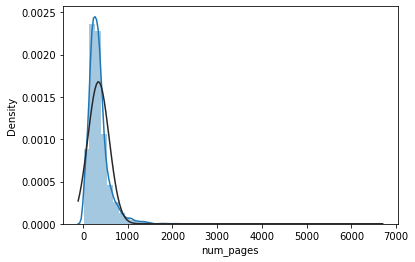

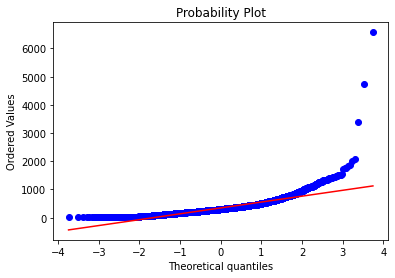

In [33]:
sns.distplot(train_enc['num_pages'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_enc['num_pages'], plot=plt)

In [34]:
# скошенность
db_ml['num_pages'].skew()

4.4888374522680765

In [35]:
# применяю преобразование Бокса-Кокса
train_enc['num_pages'],fitted_lambda = stats.boxcox(train_enc['num_pages']) 

In [36]:
a = 0.0001

# применяю логарифмическое преобразование
train_enc['ratings_count'] = np.log(train_enc['ratings_count'] + a) 

# применяю логарифмическое преобразование
train_enc['text_reviews_count'] = np.log(train_enc['text_reviews_count'] + a) 

In [37]:
# для тестовой выборки

# применяю преобразование Бокса-Кокса
test_enc['num_pages'] = stats.boxcox(test_enc['num_pages'], fitted_lambda) 

# применяю логарифмическое преобразование
test_enc['ratings_count'] = np.log(test_enc['ratings_count'] + a) 

# применяю логарифмическое преобразование
test_enc['text_reviews_count'] = np.log(test_enc['text_reviews_count'] + a)

# Бининг

Прежде чем начать бининг, надо объединить датафрейм с признаками и датафрейм с целевым признаком. Это касается только тренировочного набора.

Про бининг важно помнить, что результатом может стать потеря части информации. Бининг полезен для того, чтобы помочь модели определить нелинейные связи. Таким образом, у этой процедуры есть как минусы, так и плюсы.

In [38]:
x_y_train = train_enc.merge(y_train, left_index=True, right_index=True)

Проводить бининг можно автоматически, например с помощью sklearn.preprocessing.KBinsDiscretizer. Однако лучше использовать ручные методы, чтобы разобраться в происходящем.

Последовательность будет следующая:

1) разделю переменную по квантилям;

2) создам таблицу сопряженности; 

3) создам таблицу, которая отражает важность полученных групп.

In [39]:
x_y_train['ratings_count_group'] = pd.qcut(train_enc['ratings_count'], 5).astype('object')

# таблица совместного распределения
biv = pd.crosstab(x_y_train['ratings_count_group'], x_y_train['rating_groups']) 
print(biv)

feature,target = 'ratings_count_group','rating_groups'
train_woe_iv = (pd.crosstab(x_y_train[feature],x_y_train[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(train_woe_iv)
print(train_woe_iv['iv'].sum())

rating_groups          0    1
ratings_count_group          
(-9.211, 4.277]      839  689
(4.277, 5.964]       806  704
(5.964, 7.427]       786  729
(7.427, 9.022]       765  751
(9.022, 15.341]      677  840
rating_groups               0         1       woe        iv
ratings_count_group                                        
(-9.211, 4.277]      0.216628  0.185564 -0.154780  0.020127
(4.277, 5.964]       0.208107  0.189604 -0.093116  0.020127
(5.964, 7.427]       0.202943  0.196337 -0.033094  0.020127
(7.427, 9.022]       0.197521  0.202262  0.023719  0.020127
(9.022, 15.341]      0.174800  0.226232  0.257920  0.020127
0.10063741964264059


Таблица сопряженности (первая таблица выше) показывает, как делят квантили зависимую переменную. 

Таблица групп (вторая таблица выше) показывает, насколько важными являются эти группы. Здесь я получил показатели мощности групп, то есть их способность разделять зависимую переменную на 1 и 0.

Начну с woe. Этот показатель в идеале должен идти от отрицательных значений к положительным (или наоборот). Если каждая последующая категория больше предыдущей, то прогнозная сила переменной выше. Категории со схожими значениями woe объединяют.

Сумма IV равна 0.10. Это означает, что переменная имеет среднюю предсказательную способность. Высокая идет после 0.3.

Теперь проверю другие переменные.

In [40]:
x_y_train['num_pages_group'] = pd.qcut(train_enc['num_pages'], 5).astype('object')
biv = pd.crosstab(x_y_train['num_pages_group'], x_y_train['rating_groups'])
print(biv)

feature,target = 'num_pages_group','rating_groups'
train_woe_iv = (pd.crosstab(x_y_train[feature],x_y_train[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(train_woe_iv)
print(train_woe_iv['iv'].sum())

rating_groups       0    1
num_pages_group           
(3.462, 12.264]   782  747
(12.264, 13.896]  833  678
(13.896, 15.363]  904  622
(15.363, 16.948]  814  693
(16.948, 40.645]  540  973
rating_groups            0         1       woe        iv
num_pages_group                                         
(3.462, 12.264]   0.201911  0.201185 -0.003600  0.107346
(12.264, 13.896]  0.215079  0.182602 -0.163697  0.107346
(13.896, 15.363]  0.233411  0.167520 -0.331700  0.107346
(15.363, 16.948]  0.210173  0.186642 -0.118741  0.107346
(16.948, 40.645]  0.139427  0.262052  0.631004  0.107346
0.5367323740188422


In [41]:
x_y_train['text_reviews_count_groups'] = pd.qcut(train_enc['text_reviews_count'], 5).astype('object')

biv = pd.crosstab(x_y_train['text_reviews_count_groups'], x_y_train['rating_groups'])
print(biv)

feature,target = 'text_reviews_count_groups','rating_groups'
train_woe_iv = (pd.crosstab(x_y_train[feature],x_y_train[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(train_woe_iv)

print(train_woe_iv['iv'].sum())

rating_groups                0    1
text_reviews_count_groups          
(-9.211, 1.792]            809  742
(1.792, 3.296]             786  709
(3.296, 4.5]               761  748
(4.5, 5.903]               776  738
(5.903, 11.454]            741  776
rating_groups                     0         1       woe        iv
text_reviews_count_groups                                        
(-9.211, 1.792]            0.208882  0.199838 -0.044260  0.002829
(1.792, 3.296]             0.202943  0.190951 -0.060912  0.002829
(3.296, 4.5]               0.196489  0.201454  0.024959  0.002829
(4.5, 5.903]               0.200361  0.198761 -0.008019  0.002829
(5.903, 11.454]            0.191325  0.208995  0.088341  0.002829
0.014143079603546618


In [42]:
x_y_train['text_reviews_count_groups'] = pd.qcut(train_enc['len_title'], 5).astype('object')

biv = pd.crosstab(x_y_train['text_reviews_count_groups'], x_y_train['rating_groups'])
print(biv)

feature,target = 'text_reviews_count_groups','rating_groups'
train_woe_iv = (pd.crosstab(x_y_train[feature],x_y_train[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(train_woe_iv)

print(train_woe_iv['iv'].sum())

rating_groups                0    1
text_reviews_count_groups          
(1.999, 13.0]              912  608
(13.0, 19.0]               953  732
(19.0, 27.0]               740  708
(27.0, 45.0]               639  808
(45.0, 209.0]              629  857
rating_groups                     0         1       woe        iv
text_reviews_count_groups                                        
(1.999, 13.0]              0.235476  0.163749 -0.363276  0.075513
(13.0, 19.0]               0.246062  0.197145 -0.221645  0.075513
(19.0, 27.0]               0.191066  0.190681 -0.002017  0.075513
(27.0, 45.0]               0.164988  0.217614  0.276847  0.075513
(45.0, 209.0]              0.162406  0.230811  0.351496  0.075513
0.37756443346937774


Таким образом, разобью в тренировочном и тестовом наборе данные по количеству страниц и длине названия книги. Обзоры значимой информации не дают. 

In [43]:
# бининг на основе квантилей
train_enc['ratings_count_group'] = pd.qcut(train_enc['len_title'], 5, labels=["1", '2', '3', '4', '5']).astype('object') 
train_enc['num_pages_group'] = pd.qcut(train_enc['num_pages'], 5, labels=["1", '2', '3', '4', '5']).astype('object') 

In [44]:
# бининг на основе квантилей

test_enc['ratings_count_group'] = pd.qcut(test_enc['len_title'], 5, labels=["1", '2', '3', '4', '5']).astype('object')
test_enc['num_pages_group'] = pd.qcut(test_enc['num_pages'], 5, labels=["1", '2', '3', '4', '5']).astype('object') 

In [45]:
train_enc['rating_reviews'] = train_enc['ratings_count'] / train_enc['text_reviews_count'] 
train_enc['rating_reviews'].replace(np.nan, 1, inplace=True)
train_enc['rating_reviews'].replace([np.inf, -np.inf], 1, inplace=True) 

In [46]:
test_enc['rating_reviews'] = test_enc['ratings_count'] / test_enc['text_reviews_count'] 
test_enc['rating_reviews'].replace(np.nan, 1, inplace=True)
test_enc['rating_reviews'].replace([np.inf, -np.inf], 1, inplace=True) 

# Масштабирование

In [47]:
# масштабирование тренировочных данных
col_names = ['num_pages', 'ratings_count', 'rating_reviews', 'len_title', 'polarity', 'subjectivity'] 
features = train_enc[col_names] 
scaler = QuantileTransformer(n_quantiles=10, random_state=0).fit(features.values) 
features = scaler.transform(features.values) 
train_enc[col_names] = features 

In [48]:
# масштабирование тестовых данных
features1 = test_enc[col_names]
features1 = scaler.transform(features1.values)
test_enc[col_names] = features1

# Отбор переменных

Хорошее объяснение процедуры отбора переменных см.  [здесь](http://rasbt.github.io/mlxtend/user_guide/evaluate/feature_importance_permutation/)

Коротко, суть в том, чтобы выбирать переменные в датафрейме и смотреть, как это повлияет на качество оценки. Ниже код приведен только для примера.

In [49]:
train_enc.head(3)

,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity,ratings_count_group,num_pages_group,rating_reviews
8142,0.095051,0.098044,-9.210340,0.478269,0.465819,0.53537,0.553675,0.472222,0.444444,0.00000,3,1,0.111109
6563,0.277662,0.251694,2.944444,0.478269,0.52224,0.459235,0.46813,0.333333,0.444444,0.00000,2,2,0.458118
8124,0.617081,0.265245,2.708057,0.478269,0.485286,0.459235,0.553675,0.148148,0.444444,0.68894,1,4,0.636619


In [50]:
"""

from mlxtend.evaluate import feature_importance_permutation

# список признаков, среди которых надо произвести отбор

col1 = ['num_pages', 'ratings_count', 'text_reviews_count', 'decade', 'quarter','tra_co'] 
forest = RandomForestClassifier(n_estimators=250, random_state=42) 
forest.fit(train_enc[col1], y_train) 
imp_vals, _ = feature_importance_permutation(
    predict_method=forest.predict,
    X=test_enc[col1].values,
    y=y_test.values,
    metric='accuracy',
    num_rounds=10,
    seed=1
)

"""

"\n\nfrom mlxtend.evaluate import feature_importance_permutation\n\n# список признаков, среди которых надо произвести отбор\n\ncol1 = ['num_pages', 'ratings_count', 'text_reviews_count', 'decade', 'quarter','tra_co'] \nforest = RandomForestClassifier(n_estimators=250, random_state=42) \nforest.fit(train_enc[col1], y_train) \nimp_vals, _ = feature_importance_permutation(\n    predict_method=forest.predict,\n    X=test_enc[col1].values,\n    y=y_test.values,\n    metric='accuracy',\n    num_rounds=10,\n    seed=1\n)\n\n"

# Обучение

In [51]:
logreg = LogisticRegression().fit(train_enc, y_train)

C:\Users\runaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
logreg.coef_

array([[-0.38861594,  2.24892233, -0.09881678,  0.89666383,  0.34283046,
         3.56171322,  1.92050219,  1.41902723,  0.15774262, -0.03003304,
        -0.04303407,  0.20758465,  1.04829837]])

In [53]:
# логарифм шанса
coef = np.round(logreg.coef_, 3)
feat_labels = train_enc.columns
for c, feature in zip(coef[0], feat_labels):
    print(feature, c)

num_pages -0.389
ratings_count 2.249
text_reviews_count -0.099
decade 0.897
quarter 0.343
tra_co 3.562
multivolume 1.921
len_title 1.419
polarity 0.158
subjectivity -0.03
ratings_count_group -0.043
num_pages_group 0.208
rating_reviews 1.048


Если коэффициент в логарифмической форме положителен, то увеличение значения признака ведет к росту логарифма шанса. Если же коэффициент отрицательный, то увеличение значения признака ведет к уменьшению логарифма шанса.

In [54]:
# экспоненциальные коэффициенты (или просто шанс) 
exp_coef = np.round(np.exp(coef), 3)
feat_labels = X_train.columns
for c, feature in zip(exp_coef[0], feat_labels):
    print(feature, c)

num_pages 0.678
ratings_count 9.478
text_reviews_count 0.906
decade 2.452
quarter 1.409
tra_co 35.234
multivolume 6.828
len_title 4.133
polarity 1.171
subjectivity 0.97


Здесь нужно помнить следующие правила:

1) если экспоненциальный коэффициент больше единицы, то увеличение значения признака ведет к увеличению шанса события;
2) если коэффициент меньше единицы, то увеличение значения признака ведет к уменьшению значения шанса;

# Оценка модели

In [55]:
predict_log = logreg.predict(test_enc) 
confmtrx = np.array(confusion_matrix(y_test, predict_log)) 
data_confus = pd.DataFrame(confmtrx, index=['Плохая_факт', 'Хорошая_факт'], columns=['Плохая_прогноз', 'Хорошая_прогноз']) 
data_confus

,Плохая_прогноз,Хорошая_прогноз
Плохая_факт,1051,610
Хорошая_факт,655,936


В этой таблице левое верхнее значение - это TN (истиноотрицательные результаты), правое верхнее - это FP (ложноположительные результаты), нижнее левое - это FN (ложноотрицательные результаты), првое нижнее - это TP (истиноположительные результаты).

Столбцы - это прогноз нашей модели, строки - это фактические данные. Модель 1056 раз предсказала плохую оценку и это совпадает с фактом. Но вот ошиблась в предсказании модель 653 раза. Аналогично, наша модель 938 раз предсказала, что оценка хорошая, что совпало с фактом. Однако и ошиблась модель 605 раз (оценка была плохая, а модель предсказала хорошую). 

Теперь отойду от этой формальности. Я хотел выяснить, какую оценку получает книга, еще точнее - получит ли она хорошую оценку. Но практически одинаково модель ошибается с предсказанием в положительную и отрицательную сторону. Теперь вернемся к формальностям. 

In [56]:
# истинноположительные результаты
TP = data_confus.loc['Хорошая_факт', 'Хорошая_прогноз'] 

# ложноположительные результаты
FP = data_confus.loc['Плохая_факт', 'Хорошая_прогноз'] 

# истиннотрицательные результаты
TN = data_confus.loc['Плохая_факт', 'Плохая_прогноз'] 

# ложноотрицательные результаты
FN = data_confus.loc['Хорошая_факт', 'Плохая_прогноз'] 

In [57]:
from sklearn.metrics import f1_score

TPR=(float(TP) / (TP + FN))
TNR=(float(TN) / (TN + FP)) 
PPV=(float(TP) / (TP + FP)) 
NPV=(float(TN) / (TN + FN)) 
FNR=(float(FN) / (FN + TP))
FPR=(float(FP) / (FP + TN))
FDR=(float(FP) / (FP + TP))
FOR=(float(FN) / (FN + TN))
TS=(float(TP) / (TP+FN + FP))
ACC=(float(TP+TN) / (TP+FP+FN + TN))  
F1=2*TP/(2*TP+FP+FN)

print ("sensitivity, recall, hit rate, or true positive rate (TPR): ",TPR)
print ("specificity, selectivity or true negative rate (TNR): ",TNR)
print ("precision or positive predictive value (PPV): ",PPV)
print ("negative predictive value (NPV): ",NPV)
print ("miss rate or false negative rate (FNR): ",FNR)
print ("fall-out or false positive rate (FPR): ",FPR)
print ("false discovery rate (FDR): ",FDR)
print ("false omission rate (FOR): ",FOR)
print ("Threat score (TS) or Critical Success Index (CSI): ",TS)
print("")
print ("accuracy (ACC): ",ACC)
print ("F1: ",F1)

sensitivity, recall, hit rate, or true positive rate (TPR):  0.5883092394720302
specificity, selectivity or true negative rate (TNR):  0.6327513546056592
precision or positive predictive value (PPV):  0.6054333764553687
negative predictive value (NPV):  0.6160609613130129
miss rate or false negative rate (FNR):  0.4116907605279698
fall-out or false positive rate (FPR):  0.36724864539434077
false discovery rate (FDR):  0.3945666235446313
false omission rate (FOR):  0.3839390386869871
Threat score (TS) or Critical Success Index (CSI):  0.42526124488868694

accuracy (ACC):  0.6110086100861009
F1:  0.5967484858144724


Вот интерпретация.

**TPR** - это sensitivity (полнота). Отношение того, сколько модель правильно указала правильных положительных ответов. Это говорит, насколько точно модель угадывает положительные ответы. Здесь всего 0.590.

**TNR** - это специфичность. Отношение того, сколько отрицательных случаев среди всех правильных отрицательных предсказаний. Это говорит о склонности модели правильно предсказывать отрицательный результат. Здесь это 0.64. То есть наша модель отлично предсказывает отрицательный класс, но плохо предсказывает положительный.

**PPV** - это precision. Отношение того, сколько правильных положительных предсказаний среди всех положительных предсказаний. Это говорит, насколько угадывает модель в своих положительных предсказаниях. Здесь это 0.61, то есть чуть боле чем в половине случаев положительное предсказание модели оказывается истиной. 

**NPV** - это доля правильных отрицательных предсказаний среди всех отрицательных предсказаний.

**FNR** - это доля ложноотрицательных результатов среди положительных фактических предсказаний.

**FPR** - это доля ложных положительных предсказаний модели среди всех отрицательных фактических результатов. То есть сколько модель не может ухватить отрицательных результатов. Здесь это 0.11.

**FDR** - это доля ложноположительных результатов среди всех положительных предсказаний модели. 

**FOR** - это доля ложноотрицательных результатов среди всех отрицательных предсказаний.

**TS**- это доля истинноположительных результатов в сумме положительных фактических результатов и положительных прогнозов.

**ACC** - точность, доля истинных результатов среди всех результатов. Здесь это 0.61, что относительно приемлемо, но лучше больше 70%.

**F1** - это доля того, сколько наблюдений, отмеченных как положительные, на самом деле положительные. 

А вот табличная форма:

![Оценка регрессии](./images/logreg_score.png 'Оценка регрессии')

# Кросс-валидация

In [58]:
"""

# привожу для примера

print(cross_val_score(logreg, test_enc, y_test, scoring='accuracy', cv=5)) # точность
print(' ')
print(cross_val_score(logreg, test_enc, y_test, scoring='precision', cv=5)) # прецизионность
print(' ')
print(cross_val_score(logreg, test_enc, y_test, scoring='recall', cv=5)) # полнота
print(' ')
print(cross_val_score(logreg, test_enc, y_test, scoring='f1', cv=5)) # f1

"""

"\n\n# привожу для примера\n\nprint(cross_val_score(logreg, test_enc, y_test, scoring='accuracy', cv=5)) # точность\nprint(' ')\nprint(cross_val_score(logreg, test_enc, y_test, scoring='precision', cv=5)) # прецизионность\nprint(' ')\nprint(cross_val_score(logreg, test_enc, y_test, scoring='recall', cv=5)) # полнота\nprint(' ')\nprint(cross_val_score(logreg, test_enc, y_test, scoring='f1', cv=5)) # f1\n\n"

# ROC-Curve

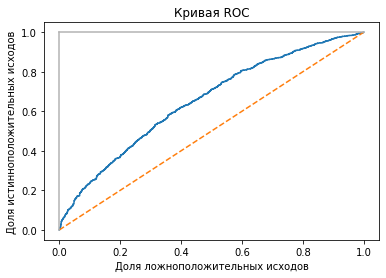

In [59]:
target_probabilities = logreg.predict_proba(test_enc)[:, 1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, target_probabilities)
plt.title('Кривая ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c='.7')
plt.plot([1, 1], c='.7')
plt.ylabel('Доля истинноположительных исходов')
plt.xlabel('Доля ложноположительных исходов')
plt.show()

In [60]:
print('AUC на обучающей выборке: {:.3f}'.format(roc_auc_score(y_train, logreg.predict_proba(train_enc)[:, 1])))
print('AUC на тестовой выборке: {:.3f}'.format(roc_auc_score(y_test, logreg.predict_proba(test_enc)[:, 1])))

AUC на обучающей выборке: 0.646
AUC на тестовой выборке: 0.652


Интерпретация следующая: чем лучше модель, тем ближе синия линия к сплошной линии.

Как строится ROC-кривая? 

1) Сортирую наблюдения по вероятности положительного класса. 
2) На графике по оси абсцисс указываю значения 1-специфичность (цена деления равна 1 делить на количество наблюдений фактического отрицательного класса), по оси ординат указываем чувствительность (цена деления здесь это 1 делить на количество наблюдений фактического положительного класса). 
3) Начинаю с точки 0,0. Если **x** принадлежит положительному классу, то двигаемся на одно деление вверх, если отрицательному - то на одно деление вправо. Точка, которая ближе всего к левому верхнему углу - это точка, которая дает наибольшую правильность классификации.

Считается, что значение roc_auc_curve от 0,9 до 1 - отличное, 0,8 до 0,9 очень хорошее, 0,7-0,8 хорошее, 0,6-0,7 среднее, 0,5 до 0,6 неудовлетворительное.

### График точность-полнота

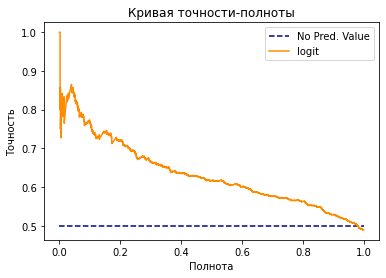

In [61]:
preds = logreg.predict(test_enc)
y_pred_proba = logreg.predict_proba(test_enc)[::,1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
f1=metrics.f1_score(y_test, preds)
auc=metrics.roc_auc_score(y_test, preds)
plt.plot([0, 1], [0.5, 0.5], color='navy', linestyle='--', label='No Pred. Value')
plt.plot(recall, precision, label='logit', color='darkorange')
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('Кривая точности-полноты')
plt.legend(loc="upper right")
plt.show()

Интерпретация следующая. Полнота (TPR) отражает сколько модель правильно указала истинных положительных ответов, то есть сколько модель реально угадала. Точность (PPV) показывает, сколько истинных результатов среди положительных результатов модели.

Эмпирическое правило. Если положительный класс является редким (или нас больше заботят ложноположительные классификации), необходимо предпочтение отдавать кривой точность-полнота. В остальных случаях - кривой ROC.

# Проверка базовым классификатором

In [62]:
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(train_enc, y_train)
dummy.score(test_enc, y_test)

0.509840098400984

Оценка для базового классификатора хуже, чем для полученого мной, но не значительно и остается выше 50%.

In [63]:
# отчет о работе модели
print(classification_report(y_test, predict_log))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      1661
           1       0.61      0.59      0.60      1591

    accuracy                           0.61      3252
   macro avg       0.61      0.61      0.61      3252
weighted avg       0.61      0.61      0.61      3252



# Улучшение модели

In [64]:
"""

# приводится для примера 

# проверка на мультиколинеарность

# результат не должен быть больше 10


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_temp = sm.add_constant(train_enc) 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))

"""

'\n\n# приводится для примера \n\n# проверка на мультиколинеарность\n\n# результат не должен быть больше 10\n\n\nimport statsmodels.api as sm\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\nx_temp = sm.add_constant(train_enc) \nvif = pd.DataFrame()\nvif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]\nvif["features"] = x_temp.columns\nprint(vif.round(1))\n\n'

In [65]:
"""
Влияние размера тренировочного набора
"""

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(max_iter=100), 
                                                        train_enc,
                                                        y_train,
                                                        cv=2,
                                                        scoring='accuracy',
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

C:\Users\runaz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\runaz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\runaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\runaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations 

In [66]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

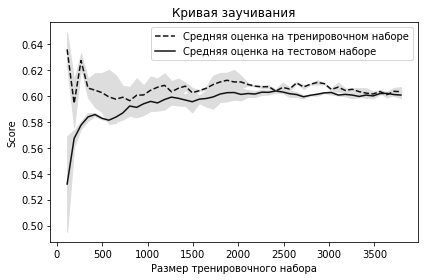

In [67]:
plt.plot(train_sizes, train_scores_mean, '--', color='#111111', label='Средняя оценка на тренировочном наборе') 
plt.plot(train_sizes, test_scores_mean, color="#111111", label='Средняя оценка на тестовом наборе')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, color='#DDDDDD')

plt.title('Кривая заучивания')
plt.xlabel('Размер тренировочного набора')
plt.ylabel('Score')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Интерпретация здесь следующая. Возьму линию тренировочного набора. Оценка точности начинается с высокого значения, так как наблюдений мало и ошибиться сложно. Затем оценка падает в районе 500 наблюдений и закрепляется в этом районе. Тестовый же набор сразу начинает неплохо, а далее линия идет относительно ровно.

In [68]:
# влияние гипперпараметров 
from sklearn.model_selection import validation_curve
param_range = [10, 230, 1500]
train_scores, test_scores = validation_curve(LogisticRegression(),
                                            test_enc,
                                            y_test,
                                            param_name='max_iter',
                                            param_range=param_range,
                                            cv=10,
                                            scoring='accuracy')

C:\Users\runaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\runaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [69]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
train_mean

array([0.5735617 , 0.61029131, 0.61029131])

In [70]:
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

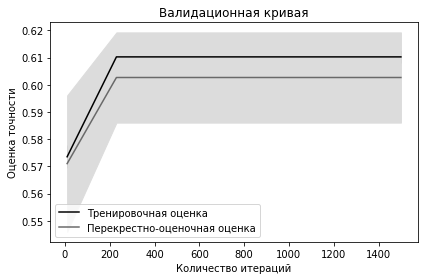

In [71]:
plt.plot(param_range, train_mean, color='black', label='Тренировочная оценка')
plt.plot(param_range, test_mean, color='dimgrey', label='Перекрестно-оценочная оценка')
plt.fill_between(param_range, train_mean - train_std, train_mean+train_std, color='gray')
plt.fill_between(param_range, test_mean-test_std, test_mean+test_std, color='gainsboro')
plt.title('Валидационная кривая')
plt.xlabel('Количество итераций')
plt.ylabel('Оценка точности')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [72]:
# поиск по сетке
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [73]:
strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
parameters={"C":[0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32], "penalty":["l1","l2", 'elasticnet', 'none'], "max_iter":[200, 300, 400], 'class_weight': ['balanced']}
grid = GridSearchCV(logreg, parameters, scoring='roc_auc', return_train_score=True, cv=strat) # по умолчанию cv=5
grid.fit(train_enc, y_train)

C:\Users\runaz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\runaz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\runaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\runaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\runaz\anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32],
                         'class_weight': ['balanced'],
                         'max_iter': [200, 300, 400],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             return_train_score=True, scoring='roc_auc')

In [74]:
# лучший параметр
print(grid.best_params_) 
print(" ")
print(grid.best_score_)

{'C': 0.18, 'class_weight': 'balanced', 'max_iter': 400, 'penalty': 'none'}
 
0.644978304517528


# Дерево решений

Здесь я не ставлю цель полностью объяснить работу алгоритма дерева решений. Однако я даю некоторые важные замечения, в том числе про ансамблевые методы. Здесь буду работать с данными почти без всякой обработки, оставлю только кодирования. 

Вначале дам более интуитивное и неформальное понятие об алгоритме решающего дерева. 

Для всех признаков и всех наблюдений в наборе данных определяются точки расщепления (значения больше и меньше этой точки). Для каждой определяется мера однородности, как правило через коэффициент Джинни. Выбирается точка с большей однородностью. Это будет узел, который разбивает данные на две группы. Применяю к каждой новой группе тот же механизм.

Важные понятия:

1) корневой узел – узел, с которого начинается расщепление;
2) листовой узел  - узел, который не имеет дочерних узлов.

Деревья могут применяться как к дихотамическим, так и непрерывным зависимым переменным. В этом случае вместо коэффициента Джинни или энтропии для расщепления применяется MSE.

А теперь чуть более формально на основании стр. 126-135 учебника Машинное обучение. Как и в любой модели машинного обучения, стоит задача по оптимизации целевой функции. Такая целевая функция для деревьев "заключается в доведении до максимума прироста информации при каждом разделении". Математически это может быть записано, учитывая, что родительский узел, как правило, разбивается на левый и правый, следующим образом:

![Дерево](./images/tree.png 'Дерево')

В этой формуле f - признак для выполнения разбиения, Dp - набор данных родительского узла, Dлев - левый дочерний узел, Dправ - правый дочерний узел, I мера загрязненности, Np - общее количество образцов в родительском узле и Nлев (Nправ) - количество образцов в соответствующих узлах.

Есть три популярные меры загрязненности - коэффициент Джинни, энтропия, ошибка классификации. Как правило, используется коэффициент Джинни. Подробнее об этих мерах в учебнике Машинное обучение. 

Дополнительные замечания:

1. Масштабирование не является обязательным для построения деревьев. 

2. Рекомендую ознакомиться с этими методами по книге Практическая статистика для специалистов Data Science (Питер Брюс, Эндрю Брюс).

Теперь про алгоритм ансамблевого обучения. 

Два основных типа ансамблей - бэггинг и бустинг. 

Бэггинг предполагает создание нескольких деревьев. Каждое дерево тренируется на наборе данных, который извлечен из базовых наборов путем отбора наблюдений и признаков.

Бустинг предполагает также создание нескольких деревьев. Но деревья тренируются не параллельно, а последовательно. Причем на каждом последующем шаге учитываются результаты предыдущего. 

Из учебника Машинное обучение: "Мы должны отметить, что алгоритм бэггинга может быть результативным подходом к снижению дисперсии модели. Тем не менее, бэггинг безрезультатен в плане сокращения смещения моделей, то есть моделей, которые слишком просты, чтобы хорошо выявлять тенденцию в данных. Именно поэтому мы хотим выполнять бэггинг на ансамбле классификаторов с низким смещением, например, основанных на деревьях принятия решений" (стр. 302).

Вот как алгоритм случайного леса описан в учебнике Машинное обучение.

1. Извлечь случайную бутстрэп-выборку размером n (случайно выбрать n образцов из обучающего набора с возвращением).

2. Вырастить дерево принятия решений из бутстрэп-выборки. В каждом узле:

а) случайно выбрать d признаков без возвращения;
б) разделить узел, используя признак, который обеспечивает наилучшее разделение согласно целевой функции.

3. Повторить k раз шаги 1 и 2.

4. Объединить прогнозы всех деревьев путем назначения метки класса по большинству голосов.

Алгоритм бустинга описан на стр. 303 учебника Машинное обучение:

1. Произвести выборку случайного поднабора обучающих образцов d1 без возвращения из обучающего набора D для обучения слабого ученика C1.
2. Произвести выборку второго случайного поднабора обучающих образцов d2 без возвращения из обучающего набора и добавить 50% образцов, которые ранее были неправильно классифицированы, для обучения слабого ученика C2.
3. Найти в обучающем наборе D обучающие образцы d3, по которым C1 и C2 расходятся, для обучения третьего слабого ученика C3.
4. Объединить слабых учеников C1, C2, C3 посредством мажоритарного голосования...

...бустинг может привести к уменьшению смещения и дисперсии в сравнении с моделями на основе бэггинга. Однако на практике алгоритмы бустинга, подобные AdaBoost, также известны своей высокой дисперсией, то есть склонностью к переобучению обучающими данными.

Алгоритм AdaBoost по учебнику Машинное обучение:

1. Установить в весовом векторе w равномерные веса, где сумма весов wi равна 1. 

2. Для j-го из m раундов бустинга выполнить следующие действия:
а) обучить взвешенного слабого ученика: Cj=train(X, y, w);
б) спрогнозировать метки классов: y с шляпкой = predict(Cj, X);
в) вычислить взвешенную частоту ошибок e=w*(y с шляпкой не равно y);
г) вычислить коэффициент aj = 0.5log((1-e)/e);
д) обновить веса w := w * exp(-aj*y с шляпкой * y)
е) нормализоваь веса до суммы, равной 1: w := w/сумма wi.

3. Вычислить финальный прогноз

![Дерево](./images/tree2.png 'Дерево')

Вот пример подсчетов для AdaBoost, взятый также из учебника Машинное обучение

![Дерево](./images/tree3.png 'Дерево')

Плюсами ансамблевых методов является то, что:

1. "не приходится особо переживать по поводу выбора хороших значений для гиперпараметров";
2. "случайный лес обычно не приходится подрезать, т. к. ансамблевая модель довольно устойчива к шуму от индивидуальных деревьев принятия решений".

Дополнительные замечания:

1. Как правило, в случайных лесах достаточно экспериментов с количеством деревьев в ансамбле.
2. На практике отбирается количество признаков, равное корню квадратному из числа признаков.
3. См. также про бутстрэп гл. 7.11, про древовидные методы - гл. 9.2, про бустинг - гл. 10, случайный лес - гл. 15, ансамблевые методы - гл. 16. Все из учебника Основы обучения. 

In [75]:
X = db.drop('rating_groups', axis=1)
y = db['rating_groups']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 

In [76]:
# модель на базовых гиперпараметрах
decision_tree = DecisionTreeClassifier() 

# тренировка модели
decision_tree = decision_tree.fit(X_train, y_train) 

# оценка модели на тренировочных данных
print(accuracy_score(decision_tree.predict(X_train), y_train)) 
print(' ')

# оценка модели на тестовых данных
print(accuracy_score(decision_tree.predict(X_test), y_test)) 

1.0
 
0.5710332103321033


Оценка на тренировочном наборе равна 1. Почему так получилось? Потому что для модели не было установлено ограничений и она переобучилась. В этом слабость деревьев решений. Поэтому нужна настройка гиперпараметров.

In [77]:
# настройка модели
params1 = {'max_depth': [10, 20], 'criterion': ['gini', 'entropy']}
grid1 = GridSearchCV(decision_tree, params1, cv=5)
grid1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20]})

In [78]:
print(grid1.best_params_)
print("")
print(grid1.best_score_)

{'criterion': 'entropy', 'max_depth': 10}

0.5971529516598446


In [79]:
decision_tree1 = DecisionTreeClassifier(criterion='gini', max_depth= 10, max_leaf_nodes=2, min_samples_split=2) 
decision_tree1 = decision_tree.fit(X_train, y_train) 
print(accuracy_score(decision_tree1.predict(X_train), y_train)) 
print(' ')
print(accuracy_score(decision_tree1.predict(X_test), y_test)) 

1.0
 
0.5704182041820418


На практике рекомендуется min_samples_leaf брать от 5. 

# Визуализация дерева

In [80]:
"""

# приводится для примера

# визуализация деревьев хороша, когда мало признаков
# в противном случае прочитать эти данные практически невозможно

from IPython.display import Image
from sklearn import tree
import pydotplus
import graphviz
import os 

dot_data = tree.export_graphviz(decision_tree, out_file=None, class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

"""

'\n\n# приводится для примера\n\n# визуализация деревьев хороша, когда мало признаков\n# в противном случае прочитать эти данные практически невозможно\n\nfrom IPython.display import Image\nfrom sklearn import tree\nimport pydotplus\nimport graphviz\nimport os \n\ndot_data = tree.export_graphviz(decision_tree, out_file=None, class_names=True)\ngraph = pydotplus.graph_from_dot_data(dot_data)\nImage(graph.create_png())\n\n'

# Случайный лес

In [81]:
forest_reg = RandomForestClassifier(n_estimators=300)
forest_reg.fit(X_train, y_train)
predictions = forest_reg.predict(X_train)
forest_acc = accuracy_score(predictions, y_train)
forest_acc

1.0

In [82]:
predictions_test = forest_reg.predict(X_test)
forest_acc_test = accuracy_score(predictions_test, y_test)
forest_acc_test

0.6282287822878229

# AdaBoost

In [83]:
adaboost = AdaBoostClassifier()
model_ada = adaboost.fit(X_train, y_train)
predictions = model_ada.predict(X_train)
ada_acc = accuracy_score(predictions, y_train)
ada_acc

0.6374901133667282

In [84]:
predictions_test = model_ada.predict(X_test)
forest_acc_test = accuracy_score(predictions_test, y_test)
forest_acc_test

0.6316113161131611

# Совокупность моделей

In [85]:
voting_clf = VotingClassifier(estimators=[('lr', logreg), ('rf', forest_reg), ('ab', adaboost)], voting='hard')
voting_clf.fit(X_train, y_train)
for clf in (logreg, forest_reg, voting_clf, adaboost):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.4892373923739237
RandomForestClassifier 0.6359163591635917
VotingClassifier 0.6356088560885609
AdaBoostClassifier 0.6316113161131611


# Приложение 1

**Рекомендуемая литература:**

1) Сара Бослаф Статистика для всех
2) П. Брюс Практическая статистика для специалистов Data Science
3) С. Рашка, В. Мирджалили Python и машинное обучение
4) "Изучаем Pandas" Майкл Хейдт, Артем Груздев (обязательно второе издание). 
5) Дэвидсон, Мак-Киннон Теория и методы эконометрики (по тексту - учебник Дэвидсона)
6) David W. Hosmer Applied Logistic Regression
7) Тревор Хасти, Роберт Тибширани, Джером Фридман Основы статистического обучения (по тексту - учебник Основы обучения)

**Полезные ссылки:**

1) [Статья Binary Logistic Regression](https://www.datasklr.com/logistic-regression/logistic-regression-with-binary-target)
2) Хороший материал по решающим деревьям [здесь](https://loginom.ru/blog/decision-tree-p1)
3) руководство по применению регулярных выражений [здесь](https://developers.google.com/edu/python/regular-expressions);
4) еще одно руководство по регулярным выражениям от проекта [Dataquest](https://www.dataquest.io/blog/regular-expressions-data-scientists/)
5) и еще немного про регулярные выражения от [Towards Data Science](https://towardsdatascience.com/easiest-way-to-remember-regular-expressions-regex-178ba518bebd)
6) математическая энциклопедия от проекта [Wolfram](https://mathworld.wolfram.com/)

**Ссылки на мои ресурсы:**

1) Twitter https://twitter.com/runaz_there
2) GitHub https://github.com/Ruslan-Nazarov
3) AI for everyone (Medium) https://medium.com/ai-for-everyone
4) LinkedIn https://www.linkedin.com/in/ruslan-nazarov-223003198/
5) email runaz2007@gmail.com OR runaz@protonmail.com

**В следующей редакции:**
1) будет значительно улучшен раздел про деревья принятия решений. 

# Приложение 2 Способы кодирования категориальных переменных:

1) дамми-кодирование с помощью pd.get_dummies(). С неполным рангом – это n признаков кодируется. С полным рангом – это n-1 признак кодируется;

2) кодирование контрастами (Effect Coding) – опорный уровень устанавливается в -1;

3) кодирование в лексикографическом порядке целочисленных значений, начиная с 0 (Label Encoding). Используют для порядковых переменных;

4) кодирование по частоте наблюдений в категории переменных (Frequency Encoding). Используется только после разбиения на обучающую и контрольную выборки. Применяют как правило относительную частоту, а не абсолютную;

5) кодирование вероятностями зависимой переменной (Likelihood Encoding). Используют только после разбиения на тренировочные и тестовые данные. Для улучшения используют среднее значение, сглаженное через сигмоидальную функцию. Сглаживание применяется только на обучающей выборке. Следующий метод здесь – это кодировка средним значением зависимой переменной, сглаженным через параметр регуляризации. Еще – кодировка простым средним значением зависимой переменной по схеме leave-one-out; кодировка простым средним значением зависимой переменной по схеме k-fold; кодировка средним значением зависимой переменной, сглаженным через сигмоидальную функцию, по схеме k-fold;

6) присвоение категориям в зависимости от порядка их появления целочисленных значений, начиная с 1 (Ordinal Encoding).
